In [1]:
import pickle
import pandas as pd
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

In [49]:
# variables

# input_file = "EmbeddingOlympicsFirstNames.csv"
# output_file_png = "results/OlympicsFirstNames_1.png"
# output_file_html = "results/OlympicsFirstNames_1.html"
# variable_name = "FirstName"
# variable_country = "Region"
# mapping = "mapping_country_race"

input_file = "EmbeddingOlympicsLastNames.csv"
output_file_png = "results/OlympicsLastNames_1.png"
output_file_html = "results/OlympicsLastNames_1.html"
variable_name = "LastName"
variable_country = "Region"
mapping = "mapping_country_race"

In [50]:
df = pd.read_csv(input_file)
display(df)

LastName     Region       0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99  
0         dijiang        China  1.405 -2.230  1.017  0.215 -0.128  0.390 -0.383  0.636 -2.050 -1.410 -1.529 -0.941  0.646 -0.419 -0.674  0.219  0.569 -0.831  0.093  0.454 -0.770  1.300  0.409  0.690 -0.442  0.305  0.175 -0.497 -0.247  0.079  0.511 -0.473  0.212 -0.550 -0.132  0.245 -0.580  0.009  1.027 -0.259  0.578  0.872  1.113  0.099  0.067  1.028  0.005 -0.155  0.258 -0.858 -0.350  0.089 -0.622 -0.717  0.580  0.094  1.472  0.362 -0.468 -0.811  0.341  0.871 -0.851  2.011  0.429  0.271  1.745 -0.629  0.165  0.334  1.048  1.049  0.967  0.007  0.886  1.423  0.612  0.275 -0.504  0.609  0.320 -0.992 -0.518  0.274 -0.463 -0.424  0.218 -0.451 -0.334  1.245 -0.138 -1.252 -0.685 -0.433  1.522  0.082  0.250 -1.210  0.601 -0.045
1          lamusi        China  0.429 -1.204  0.399 -0.922 -0.442 -0.115 -0.392 -0.116 -1.179 -0.283 -0.378 -0.714 -0.400 -0.853  0.709  0.253  0.071 -1.274  0.353  0.400 -0.146  0.296  0.650  0.079  0.368 -0.005 -0.416 -0.073 -0.404  0.114  0.263 -0.498 -0.402 -1.018  0.263  0.041 -1.284  0.146  1.090 -0.426  0.390 -0.466 -0.346  0.251  1.240  0.928  0.299  1.074  0.228 -0.756 -0.733  0.833  0.311  0.426  0.080 -0.657 -0.503 -0.022 -1.253 -0.054  0.534  0.582 -0.362  0.503 -0.036 -1.272  1.663 -0.008 -0.036 -0.164 -0.041  0.308  0.752  1.051  0.891  1.043  0.701  1.963  0.140  0.673  2.128  0.182 -0.643  1.209  0.195  0.325  0.143  1.319  0.956  0.424  0.192 -0.639  0.302 -0.502  0.341 -0.334  0.253 -0.942  1.818 -0.531
2            aaby      Denmark -1.331 -0.568 -0.363  0.435  0.496  0.706  0.811 -1.203  0.455  0.955  1.111  1.764 -1.643  0.708  0.225 -2.748  0.816  0.701  0.291 -0.452 -1.278 -1.525  1.493 -0.636  1.041 -1.062  0.982  1.203 -1.421  0.304  0.920 -0.311  0.475  2.483 -1.591 -0.458 -1.244  0.841 -0.945 -1.633 -0.282  0.927  1.291  0.835 -1.843  0.376 -1.272 -1.094 -0.266  0.147 -1.166  0.275  2.315 -0.109  2.222  1.556  0.393  2.303  1.235  1.490  1.599 -0.196 -1.563  0.030  0.751 -0.134  0.119 -0.849  1.240  1.414 -1.354  1.217 -0.269  0.651  2.389  1.440  2.063 -1.672  0.045  0.539 -1.395  0.839  2.417  2.751  0.444  0.238  1.814  0.886  1.641 -0.989  3.103 -0.037 -0.785  0.901 -0.846  0.458 -0.119 -0.744  1.023  0.022
3           aabye      Denmark -1.130 -2.424 -0.386  0.111  1.114 -1.371  1.230 -1.084 -0.538 -0.375 -0.452 -0.328 -0.900  1.266 -0.559 -3.322  0.698  0.703  0.795 -0.889 -0.872 -1.902  1.183  0.452 -0.226  0.222  1.761  1.315 -0.755 -0.246  0.149  0.808  0.837  1.118  0.227 -0.262 -1.382  2.379  1.661 -0.477  2.408 -0.326  1.568  1.393 -2.225  0.750 -1.843 -0.969 -0.404 -0.124 -1.345 -0.471 -0.163 -1.455 -0.728  1.523  0.406  1.547  0.671  1.490  0.527  1.051 -1.879  0.428  0.959 -1.750  0.327 -0.784  0.999  0.635 -1.418  0.366  0.318  0.295  1.821 -0.518  0.465  0.669 -0.357  0.469 -1.625 -0.669  1.510  1.634 -0.714 -1.686  2.953  0.247  0.521  0.445  2.165 -0.819  0.469  2.219 -0.550  0.037  0.947  1.034 -0.194 -0.497
4         aaftink  Netherlands -0.180 -0.726 -0.592 -1.363  0.973 -0.265 -1.131 -1.406 -0.483  0.118 -0.902  0.041  0.414  0.164  1.203 -0.525 -0.175  0.147 -0.089 -0.374  0.402 -1.216  0.623 -0.694  0.248  0.006 -0.056 -0.335  0.755 -0.432 -0.663  0.229  0.078 -0.894  0.451 -0.728  0.054  1.465 -0.325 -0.901 -1.419  0.607 -0.727 -0.720 -0.788  0.290 

In [51]:
file_to_read = open(mapping, "rb")
dic_ethnicity_direct = pickle.load(file_to_read)
print(dic_ethnicity_direct)
print(len(dic_ethnicity_direct))
file_to_read.close()

{'China': 'Asian', 'Denmark': 'White', 'Netherlands': 'White', 'Finland': 'White', 'Norway': 'White', 'Romania': 'White', 'Estonia': 'White', 'Morocco': 'White', 'Egypt': 'White', 'Iran': 'White', 'Bulgaria': 'White', 'Chad': 'White', 'Azerbaijan': 'White', 'Sudan': 'White', 'Russia': 'White', 'Argentina': 'Hispanic', 'Cuba': 'Hispanic', 'Belarus': 'White', 'Greece': 'White', 'Cameroon': 'Black', 'Turkey': 'White', 'Chile': 'Hispanic', 'Mexico': 'Hispanic', 'Nicaragua': 'Hispanic', 'Hungary': 'White', 'Nigeria': 'Black', 'Algeria': 'White', 'Kuwait': 'White', 'Bahrain': 'White', 'Pakistan': 'White', 'Iraq': 'White', 'Syria': 'White', 'Lebanon': 'White', 'Qatar': 'White', 'Malaysia': 'Asian', 'Ireland': 'White', 'South Africa': 'Black', 'Eritrea': 'Black', 'Tanzania': 'Black', 'Jordan': 'White', 'Tunisia': 'White', 'Libya': 'White', 'Belgium': 'White', 'Djibouti': 'Black', 'Palestine': 'White', 'Comoros': 'Black', 'Kazakhstan': 'White', 'Brunei': 'Asian', 'India': 'Asian', 'Saudi Arabia

In [52]:
Y = df[variable_country].to_numpy()
print(Y.shape)

Y_ethnicity = []
Y_ethnicity_name = []
for i in Y:
#     Y_ethnicity.append(dic_ethnicity[i])
#     Y_ethnicity_name.append(dic_ethnicity_name[Y_ethnicity[-1]])
    Y_ethnicity_name.append(dic_ethnicity_direct[i])

Y_ethnicity = np.array(Y_ethnicity)
Y_ethnicity_name = np.array(Y_ethnicity_name)

print(Y_ethnicity)
print(Y_ethnicity_name)

df["Ethnicity"] = Y_ethnicity_name
display(df)


(46020,)
[]
['Asian' 'Asian' 'White' ... 'Hispanic' 'White' 'White']


LastName     Region       0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99   Ethnicity
0         dijiang        China  1.405 -2.230  1.017  0.215 -0.128  0.390 -0.383  0.636 -2.050 -1.410 -1.529 -0.941  0.646 -0.419 -0.674  0.219  0.569 -0.831  0.093  0.454 -0.770  1.300  0.409  0.690 -0.442  0.305  0.175 -0.497 -0.247  0.079  0.511 -0.473  0.212 -0.550 -0.132  0.245 -0.580  0.009  1.027 -0.259  0.578  0.872  1.113  0.099  0.067  1.028  0.005 -0.155  0.258 -0.858 -0.350  0.089 -0.622 -0.717  0.580  0.094  1.472  0.362 -0.468 -0.811  0.341  0.871 -0.851  2.011  0.429  0.271  1.745 -0.629  0.165  0.334  1.048  1.049  0.967  0.007  0.886  1.423  0.612  0.275 -0.504  0.609  0.320 -0.992 -0.518  0.274 -0.463 -0.424  0.218 -0.451 -0.334  1.245 -0.138 -1.252 -0.685 -0.433  1.522  0.082  0.250 -1.210  0.601 -0.045     Asian
1          lamusi        China  0.429 -1.204  0.399 -0.922 -0.442 -0.115 -0.392 -0.116 -1.179 -0.283 -0.378 -0.714 -0.400 -0.853  0.709  0.253  0.071 -1.274  0.353  0.400 -0.146  0.296  0.650  0.079  0.368 -0.005 -0.416 -0.073 -0.404  0.114  0.263 -0.498 -0.402 -1.018  0.263  0.041 -1.284  0.146  1.090 -0.426  0.390 -0.466 -0.346  0.251  1.240  0.928  0.299  1.074  0.228 -0.756 -0.733  0.833  0.311  0.426  0.080 -0.657 -0.503 -0.022 -1.253 -0.054  0.534  0.582 -0.362  0.503 -0.036 -1.272  1.663 -0.008 -0.036 -0.164 -0.041  0.308  0.752  1.051  0.891  1.043  0.701  1.963  0.140  0.673  2.128  0.182 -0.643  1.209  0.195  0.325  0.143  1.319  0.956  0.424  0.192 -0.639  0.302 -0.502  0.341 -0.334  0.253 -0.942  1.818 -0.531     Asian
2            aaby      Denmark -1.331 -0.568 -0.363  0.435  0.496  0.706  0.811 -1.203  0.455  0.955  1.111  1.764 -1.643  0.708  0.225 -2.748  0.816  0.701  0.291 -0.452 -1.278 -1.525  1.493 -0.636  1.041 -1.062  0.982  1.203 -1.421  0.304  0.920 -0.311  0.475  2.483 -1.591 -0.458 -1.244  0.841 -0.945 -1.633 -0.282  0.927  1.291  0.835 -1.843  0.376 -1.272 -1.094 -0.266  0.147 -1.166  0.275  2.315 -0.109  2.222  1.556  0.393  2.303  1.235  1.490  1.599 -0.196 -1.563  0.030  0.751 -0.134  0.119 -0.849  1.240  1.414 -1.354  1.217 -0.269  0.651  2.389  1.440  2.063 -1.672  0.045  0.539 -1.395  0.839  2.417  2.751  0.444  0.238  1.814  0.886  1.641 -0.989  3.103 -0.037 -0.785  0.901 -0.846  0.458 -0.119 -0.744  1.023  0.022     White
3           aabye      Denmark -1.130 -2.424 -0.386  0.111  1.114 -1.371  1.230 -1.084 -0.538 -0.375 -0.452 -0.328 -0.900  1.266 -0.559 -3.322  0.698  0.703  0.795 -0.889 -0.872 -1.902  1.183  0.452 -0.226  0.222  1.761  1.315 -0.755 -0.246  0.149  0.808  0.837  1.118  0.227 -0.262 -1.382  2.379  1.661 -0.477  2.408 -0.326  1.568  1.393 -2.225  0.750 -1.843 -0.969 -0.404 -0.124 -1.345 -0.471 -0.163 -1.455 -0.728  1.523  0.406  1.547  0.671  1.490  0.527  1.051 -1.879  0.428  0.959 -1.750  0.327 -0.784  0.999  0.635 -1.418  0.366  0.318  0.295  1.821 -0.518  0.465  0.669 -0.357  0.469 -1.625 -0.669  1.510  1.634 -0.714 -1.686  2.953  0.247  0.521  0.445  2.165 -0.819  0.469  2.219 -0.550  0.037  0.947  1.034 -0.194 -0.497     White
4         aaftink  Netherlands -0.180 -0.726 -0.592 -1.363  0.973 -0.265 -1.131 -1.406 -0.483  0.118 -0.902  0.041  0.414  0.164  1.203 -0.525 -0.175  0.147 -0.089 -0.374  0.402 -1.216  0.623 -0.694  0.248  0.006 -0.056 -0.335  0.755 -0.432 -0.663  0.229  0.078 -0.894  0.451 -0.728  0.054  1.465 -0.325

In [53]:
df.drop_duplicates(subset=[variable_name, "Ethnicity"], inplace = True, ignore_index = True)
display(df)

df.drop_duplicates(subset=[variable_name], keep = False, inplace = True, ignore_index = True)
display(df)

LastName     Region       0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99   Ethnicity
0         dijiang        China  1.405 -2.230  1.017  0.215 -0.128  0.390 -0.383  0.636 -2.050 -1.410 -1.529 -0.941  0.646 -0.419 -0.674  0.219  0.569 -0.831  0.093  0.454 -0.770  1.300  0.409  0.690 -0.442  0.305  0.175 -0.497 -0.247  0.079  0.511 -0.473  0.212 -0.550 -0.132  0.245 -0.580  0.009  1.027 -0.259  0.578  0.872  1.113  0.099  0.067  1.028  0.005 -0.155  0.258 -0.858 -0.350  0.089 -0.622 -0.717  0.580  0.094  1.472  0.362 -0.468 -0.811  0.341  0.871 -0.851  2.011  0.429  0.271  1.745 -0.629  0.165  0.334  1.048  1.049  0.967  0.007  0.886  1.423  0.612  0.275 -0.504  0.609  0.320 -0.992 -0.518  0.274 -0.463 -0.424  0.218 -0.451 -0.334  1.245 -0.138 -1.252 -0.685 -0.433  1.522  0.082  0.250 -1.210  0.601 -0.045     Asian
1          lamusi        China  0.429 -1.204  0.399 -0.922 -0.442 -0.115 -0.392 -0.116 -1.179 -0.283 -0.378 -0.714 -0.400 -0.853  0.709  0.253  0.071 -1.274  0.353  0.400 -0.146  0.296  0.650  0.079  0.368 -0.005 -0.416 -0.073 -0.404  0.114  0.263 -0.498 -0.402 -1.018  0.263  0.041 -1.284  0.146  1.090 -0.426  0.390 -0.466 -0.346  0.251  1.240  0.928  0.299  1.074  0.228 -0.756 -0.733  0.833  0.311  0.426  0.080 -0.657 -0.503 -0.022 -1.253 -0.054  0.534  0.582 -0.362  0.503 -0.036 -1.272  1.663 -0.008 -0.036 -0.164 -0.041  0.308  0.752  1.051  0.891  1.043  0.701  1.963  0.140  0.673  2.128  0.182 -0.643  1.209  0.195  0.325  0.143  1.319  0.956  0.424  0.192 -0.639  0.302 -0.502  0.341 -0.334  0.253 -0.942  1.818 -0.531     Asian
2            aaby      Denmark -1.331 -0.568 -0.363  0.435  0.496  0.706  0.811 -1.203  0.455  0.955  1.111  1.764 -1.643  0.708  0.225 -2.748  0.816  0.701  0.291 -0.452 -1.278 -1.525  1.493 -0.636  1.041 -1.062  0.982  1.203 -1.421  0.304  0.920 -0.311  0.475  2.483 -1.591 -0.458 -1.244  0.841 -0.945 -1.633 -0.282  0.927  1.291  0.835 -1.843  0.376 -1.272 -1.094 -0.266  0.147 -1.166  0.275  2.315 -0.109  2.222  1.556  0.393  2.303  1.235  1.490  1.599 -0.196 -1.563  0.030  0.751 -0.134  0.119 -0.849  1.240  1.414 -1.354  1.217 -0.269  0.651  2.389  1.440  2.063 -1.672  0.045  0.539 -1.395  0.839  2.417  2.751  0.444  0.238  1.814  0.886  1.641 -0.989  3.103 -0.037 -0.785  0.901 -0.846  0.458 -0.119 -0.744  1.023  0.022     White
3           aabye      Denmark -1.130 -2.424 -0.386  0.111  1.114 -1.371  1.230 -1.084 -0.538 -0.375 -0.452 -0.328 -0.900  1.266 -0.559 -3.322  0.698  0.703  0.795 -0.889 -0.872 -1.902  1.183  0.452 -0.226  0.222  1.761  1.315 -0.755 -0.246  0.149  0.808  0.837  1.118  0.227 -0.262 -1.382  2.379  1.661 -0.477  2.408 -0.326  1.568  1.393 -2.225  0.750 -1.843 -0.969 -0.404 -0.124 -1.345 -0.471 -0.163 -1.455 -0.728  1.523  0.406  1.547  0.671  1.490  0.527  1.051 -1.879  0.428  0.959 -1.750  0.327 -0.784  0.999  0.635 -1.418  0.366  0.318  0.295  1.821 -0.518  0.465  0.669 -0.357  0.469 -1.625 -0.669  1.510  1.634 -0.714 -1.686  2.953  0.247  0.521  0.445  2.165 -0.819  0.469  2.219 -0.550  0.037  0.947  1.034 -0.194 -0.497     White
4         aaftink  Netherlands -0.180 -0.726 -0.592 -1.363  0.973 -0.265 -1.131 -1.406 -0.483  0.118 -0.902  0.041  0.414  0.164  1.203 -0.525 -0.175  0.147 -0.089 -0.374  0.402 -1.216  0.623 -0.694  0.248  0.006 -0.056 -0.335  0.755 -0.432 -0.663  0.229  0.078 -0.894  0.451 -0.728  0.054  1.465 -0.325

LastName     Region       0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99   Ethnicity
0         dijiang        China  1.405 -2.230  1.017  0.215 -0.128  0.390 -0.383  0.636 -2.050 -1.410 -1.529 -0.941  0.646 -0.419 -0.674  0.219  0.569 -0.831  0.093  0.454 -0.770  1.300  0.409  0.690 -0.442  0.305  0.175 -0.497 -0.247  0.079  0.511 -0.473  0.212 -0.550 -0.132  0.245 -0.580  0.009  1.027 -0.259  0.578  0.872  1.113  0.099  0.067  1.028  0.005 -0.155  0.258 -0.858 -0.350  0.089 -0.622 -0.717  0.580  0.094  1.472  0.362 -0.468 -0.811  0.341  0.871 -0.851  2.011  0.429  0.271  1.745 -0.629  0.165  0.334  1.048  1.049  0.967  0.007  0.886  1.423  0.612  0.275 -0.504  0.609  0.320 -0.992 -0.518  0.274 -0.463 -0.424  0.218 -0.451 -0.334  1.245 -0.138 -1.252 -0.685 -0.433  1.522  0.082  0.250 -1.210  0.601 -0.045     Asian
1          lamusi        China  0.429 -1.204  0.399 -0.922 -0.442 -0.115 -0.392 -0.116 -1.179 -0.283 -0.378 -0.714 -0.400 -0.853  0.709  0.253  0.071 -1.274  0.353  0.400 -0.146  0.296  0.650  0.079  0.368 -0.005 -0.416 -0.073 -0.404  0.114  0.263 -0.498 -0.402 -1.018  0.263  0.041 -1.284  0.146  1.090 -0.426  0.390 -0.466 -0.346  0.251  1.240  0.928  0.299  1.074  0.228 -0.756 -0.733  0.833  0.311  0.426  0.080 -0.657 -0.503 -0.022 -1.253 -0.054  0.534  0.582 -0.362  0.503 -0.036 -1.272  1.663 -0.008 -0.036 -0.164 -0.041  0.308  0.752  1.051  0.891  1.043  0.701  1.963  0.140  0.673  2.128  0.182 -0.643  1.209  0.195  0.325  0.143  1.319  0.956  0.424  0.192 -0.639  0.302 -0.502  0.341 -0.334  0.253 -0.942  1.818 -0.531     Asian
2            aaby      Denmark -1.331 -0.568 -0.363  0.435  0.496  0.706  0.811 -1.203  0.455  0.955  1.111  1.764 -1.643  0.708  0.225 -2.748  0.816  0.701  0.291 -0.452 -1.278 -1.525  1.493 -0.636  1.041 -1.062  0.982  1.203 -1.421  0.304  0.920 -0.311  0.475  2.483 -1.591 -0.458 -1.244  0.841 -0.945 -1.633 -0.282  0.927  1.291  0.835 -1.843  0.376 -1.272 -1.094 -0.266  0.147 -1.166  0.275  2.315 -0.109  2.222  1.556  0.393  2.303  1.235  1.490  1.599 -0.196 -1.563  0.030  0.751 -0.134  0.119 -0.849  1.240  1.414 -1.354  1.217 -0.269  0.651  2.389  1.440  2.063 -1.672  0.045  0.539 -1.395  0.839  2.417  2.751  0.444  0.238  1.814  0.886  1.641 -0.989  3.103 -0.037 -0.785  0.901 -0.846  0.458 -0.119 -0.744  1.023  0.022     White
3           aabye      Denmark -1.130 -2.424 -0.386  0.111  1.114 -1.371  1.230 -1.084 -0.538 -0.375 -0.452 -0.328 -0.900  1.266 -0.559 -3.322  0.698  0.703  0.795 -0.889 -0.872 -1.902  1.183  0.452 -0.226  0.222  1.761  1.315 -0.755 -0.246  0.149  0.808  0.837  1.118  0.227 -0.262 -1.382  2.379  1.661 -0.477  2.408 -0.326  1.568  1.393 -2.225  0.750 -1.843 -0.969 -0.404 -0.124 -1.345 -0.471 -0.163 -1.455 -0.728  1.523  0.406  1.547  0.671  1.490  0.527  1.051 -1.879  0.428  0.959 -1.750  0.327 -0.784  0.999  0.635 -1.418  0.366  0.318  0.295  1.821 -0.518  0.465  0.669 -0.357  0.469 -1.625 -0.669  1.510  1.634 -0.714 -1.686  2.953  0.247  0.521  0.445  2.165 -0.819  0.469  2.219 -0.550  0.037  0.947  1.034 -0.194 -0.497     White
4         aaftink  Netherlands -0.180 -0.726 -0.592 -1.363  0.973 -0.265 -1.131 -1.406 -0.483  0.118 -0.902  0.041  0.414  0.164  1.203 -0.525 -0.175  0.147 -0.089 -0.374  0.402 -1.216  0.623 -0.694  0.248  0.006 -0.056 -0.335  0.755 -0.432 -0.663  0.229  0.078 -0.894  0.451 -0.728  0.054  1.465 -0.325

In [70]:
df_X = df.copy()
df_X = df_X.drop([variable_name, "Ethnicity", variable_country], axis='columns')
display(df_X)
 
countries = np.array(df[variable_country])
names = np.array(df[variable_name])

0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99  
0      1.405 -2.230  1.017  0.215 -0.128  0.390 -0.383  0.636 -2.050 -1.410 -1.529 -0.941  0.646 -0.419 -0.674  0.219  0.569 -0.831  0.093  0.454 -0.770  1.300  0.409  0.690 -0.442  0.305  0.175 -0.497 -0.247  0.079  0.511 -0.473  0.212 -0.550 -0.132  0.245 -0.580  0.009  1.027 -0.259  0.578  0.872  1.113  0.099  0.067  1.028  0.005 -0.155  0.258 -0.858 -0.350  0.089 -0.622 -0.717  0.580  0.094  1.472  0.362 -0.468 -0.811  0.341  0.871 -0.851  2.011  0.429  0.271  1.745 -0.629  0.165  0.334  1.048  1.049  0.967  0.007  0.886  1.423  0.612  0.275 -0.504  0.609  0.320 -0.992 -0.518  0.274 -0.463 -0.424  0.218 -0.451 -0.334  1.245 -0.138 -1.252 -0.685 -0.433  1.522  0.082  0.250 -1.210  0.601 -0.045
1      0.429 -1.204  0.399 -0.922 -0.442 -0.115 -0.392 -0.116 -1.179 -0.283 -0.378 -0.714 -0.400 -0.853  0.709  0.253  0.071 -1.274  0.353  0.400 -0.146  0.296  0.650  0.079  0.368 -0.005 -0.416 -0.073 -0.404  0.114  0.263 -0.498 -0.402 -1.018  0.263  0.041 -1.284  0.146  1.090 -0.426  0.390 -0.466 -0.346  0.251  1.240  0.928  0.299  1.074  0.228 -0.756 -0.733  0.833  0.311  0.426  0.080 -0.657 -0.503 -0.022 -1.253 -0.054  0.534  0.582 -0.362  0.503 -0.036 -1.272  1.663 -0.008 -0.036 -0.164 -0.041  0.308  0.752  1.051  0.891  1.043  0.701  1.963  0.140  0.673  2.128  0.182 -0.643  1.209  0.195  0.325  0.143  1.319  0.956  0.424  0.192 -0.639  0.302 -0.502  0.341 -0.334  0.253 -0.942  1.818 -0.531
2     -1.331 -0.568 -0.363  0.435  0.496  0.706  0.811 -1.203  0.455  0.955  1.111  1.764 -1.643  0.708  0.225 -2.748  0.816  0.701  0.291 -0.452 -1.278 -1.525  1.493 -0.636  1.041 -1.062  0.982  1.203 -1.421  0.304  0.920 -0.311  0.475  2.483 -1.591 -0.458 -1.244  0.841 -0.945 -1.633 -0.282  0.927  1.291  0.835 -1.843  0.376 -1.272 -1.094 -0.266  0.147 -1.166  0.275  2.315 -0.109  2.222  1.556  0.393  2.303  1.235  1.490  1.599 -0.196 -1.563  0.030  0.751 -0.134  0.119 -0.849  1.240  1.414 -1.354  1.217 -0.269  0.651  2.389  1.440  2.063 -1.672  0.045  0.539 -1.395  0.839  2.417  2.751  0.444  0.238  1.814  0.886  1.641 -0.989  3.103 -0.037 -0.785  0.901 -0.846  0.458 -0.119 -0.744  1.023  0.022
3     -1.130 -2.424 -0.386  0.111  1.114 -1.371  1.230 -1.084 -0.538 -0.375 -0.452 -0.328 -0.900  1.266 -0.559 -3.322  0.698  0.703  0.795 -0.889 -0.872 -1.902  1.183  0.452 -0.226  0.222  1.761  1.315 -0.755 -0.246  0.149  0.808  0.837  1.118  0.227 -0.262 -1.382  2.379  1.661 -0.477  2.408 -0.326  1.568  1.393 -2.225  0.750 -1.843 -0.969 -0.404 -0.124 -1.345 -0.471 -0.163 -1.455 -0.728  1.523  0.406  1.547  0.671  1.490  0.527  1.051 -1.879  0.428  0.959 -1.750  0.327 -0.784  0.999  0.635 -1.418  0.366  0.318  0.295  1.821 -0.518  0.465  0.669 -0.357  0.469 -1.625 -0.669  1.510  1.634 -0.714 -1.686  2.953  0.247  0.521  0.445  2.165 -0.819  0.469  2.219 -0.550  0.037  0.947  1.034 -0.194 -0.497
4     -0.180 -0.726 -0.592 -1.363  0.973 -0.265 -1.131 -1.406 -0.483  0.118 -0.902  0.041  0.414  0.164  1.203 -0.525 -0.175  0.147 -0.089 -0.374  0.402 -1.216  0.623 -0.694  0.248  0.006 -0.056 -0.335  0.755 -0.432 -0.663  0.229  0.078 -0.894  0.451 -0.728  0.054  1.465 -0.325 -0.901 -1.419  0.607 -0.727 -0.720 -0.788  0.290  0.135 -0.240  0.856 -0.400 -0.005  0.319 -0.504 -1.157  0.537  0.919 -0.067  0.779  0.392  1.113  0.385  0.676 -0.566  0.109  0.231 -2.122  0.188 -0.4

In [71]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df_X)
print(pca_result_50.shape)
print(pca_50.explained_variance_ratio_)
print(sum(pca_50.explained_variance_ratio_))

(36408, 50)
[0.18525544 0.07583109 0.0597943  0.05289802 0.04987994 0.04899575
 0.04048767 0.03601522 0.0282977  0.02324716 0.02175346 0.02044695
 0.01744672 0.01669545 0.0154477  0.0145231  0.01344976 0.01258322
 0.01165307 0.01073732 0.01013414 0.00978925 0.00896217 0.00851856
 0.00813943 0.00776327 0.00757355 0.00728222 0.00718006 0.00678802
 0.0067212  0.00642656 0.00606257 0.00566383 0.00552794 0.00532807
 0.00529818 0.005149   0.0049695  0.00461948 0.00458765 0.00418556
 0.00409277 0.003849   0.00369539 0.00355335 0.00350393 0.00342538
 0.00323764 0.00314702]
0.9306137108405838


In [72]:
# 2d
time_start = time.time()
tsne = TSNE()
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 358.1575219631195 seconds


In [73]:
x_plot = tsne_pca_results[:,0]
y_plot = tsne_pca_results[:,1]
print(x_plot.shape)
print(y_plot.shape)

Y_ethnicity_name = np.array(df["Ethnicity"])
print(Y_ethnicity_name.shape)

(36408,)
(36408,)
(36408,)


In [81]:
print(sns.color_palette().as_hex())

palette_first = ["#dfd6e6", '#fdf2d0' ,"#d9e7d6", '#f5dad6']
border_first = ['#9673A6', '#D6B656', '#82B366', '#AE4132']

palette_last = ["#d9e7d6", "#dfd6e6", '#f5dad6','#fdf2d0']
border_last = ['#82B366', '#9673A6', '#AE4132', '#D6B656']

if variable_name == "LastName":
    palette = palette_last
    border = border_last
else:
    palette = palette_first
    border = border_first

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


([], [])

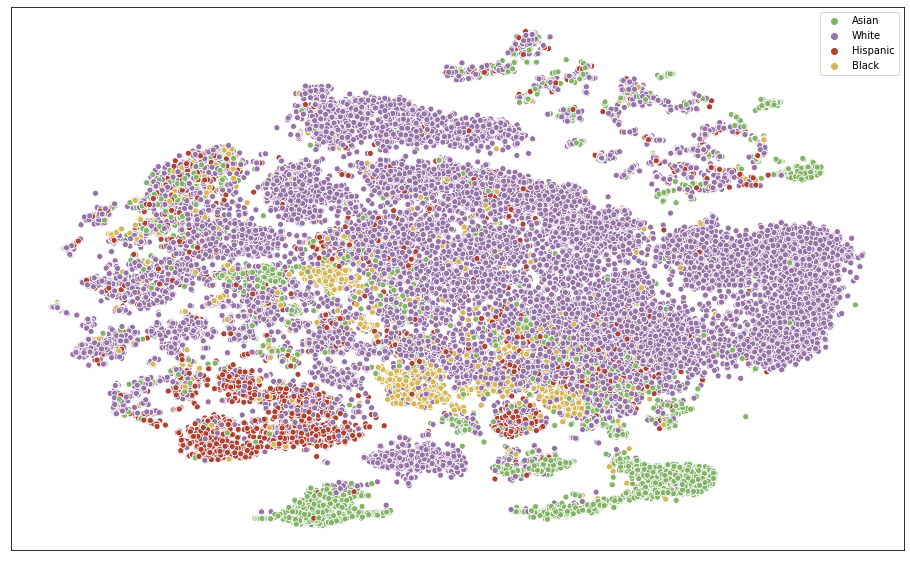

In [82]:
fig = plt.figure(figsize=(16,10))
sns.scatterplot(
    x = x_plot, y = y_plot,
    hue = Y_ethnicity_name,
    palette = sns.color_palette(border),
#     edgecolor = 'k',
#     linewidth=0
    
    #sns.color_palette()[1:5]
)
plt.xticks([])
plt.yticks([])

In [69]:
output_file_png = "final/OlympicsLastNames_3.png"
output_file_html = "final/OlympicsLastNames_3.html"

fig.savefig(output_file_png)

In [61]:
# now do with plotly to get an interactive map
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
# plotly documentation: https://plotly.com/python-api-reference/generated/plotly.express.scatter.html

hover = names + " " + countries
# print(hover)

fig = px.scatter(x = x_plot, y = y_plot, color = Y_ethnicity_name, hover_name= hover)
fig.write_html(output_file_html)